SISTEMA DE RECOMENDACION DE ANIME BASADO EN EL GENERO Y SCORE DE LA API anymelist

In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [100]:
#IMPORTO LAS LIBRERIAS A UTILIZAR
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from sklearn.linear_model import LinearRegression
from collections import Counter
import squarify as sq
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [4]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler

In [5]:
#CARGO EL CONJUNTO DE DATOS 
df_anime=pd.read_csv('animes.csv')
df_anime

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


In [6]:
len(df_anime)

19311

In [7]:
#EVALUO SI HAY VALORES REPETIDOS
df_anime['title'].value_counts()

Hakkenden: Touhou Hakken Ibun 2nd Season                         3
Doupo Cangqiong 2nd Season                                       3
Gabriel DropOut Specials                                         3
Urusei Yatsura                                                   3
Romeo x Juliet                                                   3
                                                                ..
Yami no Purple Eye                                               1
Two Tea Two                                                      1
Taku Boda                                                        1
Million Doll                                                     1
Chuunibyou demo Koi ga Shitai!: Kirameki no... Slapstick Noel    1
Name: title, Length: 16214, dtype: int64

In [8]:
#ELIMINO LAS ENTRADAS REPETIDAS
df_anime=df_anime.drop_duplicates()

In [9]:
len(df_anime)

16368

In [10]:
df_anime

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,https://cdn.myanimelist.net/images/anime/3/304...,https://myanimelist.net/anime/10075/Naruto_x_UT
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,https://cdn.myanimelist.net/images/anime/1486/...,https://myanimelist.net/anime/35828/Miira_no_K...
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,https://cdn.myanimelist.net/images/anime/6/301...,https://myanimelist.net/anime/10378/Shinryaku_...
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,https://cdn.myanimelist.net/images/anime/12/79...,https://myanimelist.net/anime/33082/Kingsglaiv...


In [11]:
df_anime=df_anime.reset_index()
df_anime

,index,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16363,19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,https://cdn.myanimelist.net/images/anime/3/304...,https://myanimelist.net/anime/10075/Naruto_x_UT
16364,19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,https://cdn.myanimelist.net/images/anime/1486/...,https://myanimelist.net/anime/35828/Miira_no_K...
16365,19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,https://cdn.myanimelist.net/images/anime/6/301...,https://myanimelist.net/anime/10378/Shinryaku_...
16366,19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,https://cdn.myanimelist.net/images/anime/12/79...,https://myanimelist.net/anime/33082/Kingsglaiv...


In [12]:
df_anime=df_anime.drop(['index'], axis=1)

In [13]:
df_anime

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
16363,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,https://cdn.myanimelist.net/images/anime/3/304...,https://myanimelist.net/anime/10075/Naruto_x_UT
16364,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,https://cdn.myanimelist.net/images/anime/1486/...,https://myanimelist.net/anime/35828/Miira_no_K...
16365,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,https://cdn.myanimelist.net/images/anime/6/301...,https://myanimelist.net/anime/10378/Shinryaku_...
16366,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,https://cdn.myanimelist.net/images/anime/12/79...,https://myanimelist.net/anime/33082/Kingsglaiv...


In [14]:
#REVISO LA INFORMACION DEL CONJUNTO DE DATOS
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16368 entries, 0 to 16367
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         16368 non-null  int64  
 1   title       16368 non-null  object 
 2   synopsis    15583 non-null  object 
 3   genre       16368 non-null  object 
 4   aired       16368 non-null  object 
 5   episodes    15825 non-null  float64
 6   members     16368 non-null  int64  
 7   popularity  16368 non-null  int64  
 8   ranked      14611 non-null  float64
 9   score       15964 non-null  float64
 10  img_url     16202 non-null  object 
 11  link        16368 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.5+ MB


In [15]:
#VERIFICO LOS NULOS 
df_anime.isnull().sum().to_frame('nulls')

,nulls
uid,0
title,0
synopsis,785
genre,0
aired,0
episodes,543
members,0
popularity,0
ranked,1757
score,404


In [16]:
#DECIDO ELIMINAR LAS COLUMNAS DE 'img_url', 'link' YA QUE NO SON IMPORTANTES EN MI ANALISIS
df_anime=df_anime.drop(['img_url', 'link'], axis=1)
df_anime.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


In [17]:
#CONVIERTO LA COLUMNA DE 'popularity' A ENTERO PARA MEJORAR LA VISUALIZACION DEL NUMERO 
df_anime['popularity'] = df_anime['popularity'].round().astype('int64')
df_anime.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


In [18]:
#CREO UN ARCHIVO DE LA DF SELECCIONADA HASTA EL MOMENTO 
df_anime.to_csv("animesnyanimelist.csv", index=True)

In [19]:
#VERIFICO LOS NULOS PARA DETERMINAR SI SE ELIMINARA ALGUNA OTRA COLUMNA O EL METODO A UTILIZAR PARA SU TRATAMIENTO
df_anime.isnull().sum().to_frame('nulls')

,nulls
uid,0
title,0
synopsis,785
genre,0
aired,0
episodes,543
members,0
popularity,0
ranked,1757
score,404


In [20]:
#REVISO COMO SE PRESENTA LA INFORMACION FALTANTE EN LAS COLUMNAS CON NULOS 
filas_con_nulos = df_anime.loc[df_anime['synopsis'].isnull()]
filas_con_nulos

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
29,9563,Hidamari Sketch x ☆☆☆ Specials,NaN,"['Slice of Life', 'Comedy', 'School', 'Seinen']","Oct 23, 2010 to Oct 30, 2010",2.0,11600,4073,790.0,7.86
31,33280,Gochuumon wa Usagi Desu ka??: Dear My Sister,NaN,"['Slice of Life', 'Comedy']","Nov 11, 2017",1.0,20779,3141,788.0,7.86
42,36160,Yaoguai Mingdan 2nd Season,NaN,"['Action', 'Comedy', 'Romance', 'Fantasy']","Aug 2, 2017 to Dec 29, 2017",21.0,5238,5659,777.0,7.87
212,36370,Ginga Eiyuu Densetsu: Die Neue These - Seiran 2,NaN,"['Action', 'Drama', 'Military', 'Sci-Fi', 'Spa...","Oct 25, 2019",4.0,8711,4598,598.0,8.00
216,39565,Boku no Hero Academia the Movie 2: Heroes:Rising,NaN,"['Action', 'Comedy', 'Super Power', 'School', ...","Dec 20, 2019",1.0,75929,1408,594.0,7.97
...,...,...,...,...,...,...,...,...,...,...
16101,34649,Soukyuu no Fafner: Dead Aggressor - The Beyond,NaN,"['Action', 'Military', 'Sci-Fi', 'Drama', 'Mec...","May 17, 2019",3.0,4598,5965,2888.0,7.22
16130,39638,Choujigen Game Neptune The Animation: Nep no N...,NaN,"['Action', 'Comedy', 'Fantasy', 'Sci-Fi']","Jul 8, 2019",1.0,7229,4973,2857.0,7.22
16161,2634,Doraemon: Doraemon Comes Back,NaN,"['Comedy', 'Fantasy', 'Kids', 'Sci-Fi', 'Shoun...","Jan 3, 1981",1.0,1339,8897,3078.0,7.17
16319,38740,Bai She: Yuan Qi,NaN,"['Action', 'Adventure', 'Historical', 'Demons'...","Jan 11, 2019",1.0,1246,9117,2904.0,7.21


In [21]:
#CAMBIO LOS VALORES NULOS DE LA COLUMNA SYNOPSIS 
df_anime['synopsis']=df_anime['synopsis'].replace(np.nan,"Not Known")
df_anime

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83
...,...,...,...,...,...,...,...,...,...,...
16363,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50
16364,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50
16365,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56
16366,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56


In [22]:
#CONFIRMO QUE SE REALIZARON LOS CAMBIOS SELECCIONANDO UNA FILA QUE TENIA NULOS COMO LA 29
df_anime.loc[27:30]

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
27,5680,K-On!,"Hirasawa Yui, a young, carefree girl entering ...","['Slice of Life', 'Comedy', 'Music', 'School']","Apr 3, 2009 to Jun 26, 2009",13.0,610222,90,792.0,7.86
28,451,InuYasha Movie 3: Tenka Hadou no Ken,"Izayoi and Inu no Taishou, Inuyasha's parents,...","['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 20, 2003",1.0,68407,1527,791.0,7.86
29,9563,Hidamari Sketch x ☆☆☆ Specials,Not Known,"['Slice of Life', 'Comedy', 'School', 'Seinen']","Oct 23, 2010 to Oct 30, 2010",2.0,11600,4073,790.0,7.86
30,30364,Haikyuu!! Movie 2: Shousha to Haisha,Second Haikyuu!! recap movie.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Sep 18, 2015",1.0,27734,2698,789.0,7.86


In [23]:
#CONFIRMO QUE YA NO HAY DATOS NULOS EN LA COLUMNA DE SYNOPSIS
df_anime['synopsis'].isnull().sum()

0

In [24]:
#SIGO CON LA COLUMNA DE EPISODES
filas_con_nulos_ep = df_anime.loc[df_anime['episodes'].isnull()]
filas_con_nulos_ep

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
104,37822,Douluo Dalu 2nd Season,Second part of Douluo Dalu .,"['Action', 'Adventure', 'Historical', 'Superna...","Dec 1, 2018 to ?",NaN,5376,5587,710.0,7.90
707,21,One Piece,"Gol D. Roger was known as the ""Pirate King,"" t...","['Action', 'Adventure', 'Comedy', 'Super Power...","Oct 20, 1999 to ?",NaN,948342,35,86.0,8.53
781,235,Detective Conan (TV),"Shinichi Kudou, a high school student of astou...","['Adventure', 'Mystery', 'Comedy', 'Police', '...","Jan 8, 1996 to ?",NaN,196953,545,295.0,8.24
1037,39023,Qin Shi Ming Yue: Canghai Hengliu,Not Known,"['Action', 'Historical', 'Martial Arts', 'Fant...","Dec 27, 2018 to ?",NaN,553,10761,1051.0,7.74
1052,966,Crayon Shin-chan,Just because an anime features a young protago...,"['Slice of Life', 'Comedy', 'Ecchi', 'School',...","Apr 13, 1992 to ?",NaN,44171,2057,1034.0,7.74
...,...,...,...,...,...,...,...,...,...,...
15411,6149,Chibi Maruko-chan (1995),Momoko Sakura is an elementary school student ...,"['Comedy', 'Kids', 'School', 'Slice of Life']","Jan 8, 1995 to ?",NaN,2360,7539,2650.0,7.27
15489,37968,Kirakira Happy★Hirake! Cocotama,Not Known,"['Fantasy', 'Kids', 'Magic', 'Slice of Life']","Sep 6, 2018 to Sep 26, 2019",NaN,405,11486,7626.0,6.18
16197,33443,Luo Xiao Hei Zhan Ji,"The story begins on a rainy night, when a home...","['Comedy', 'Supernatural']","Mar 17, 2011 to ?",NaN,1054,9404,3039.0,7.19
16265,23539,Gudetama,"Gudetama, an egg that is dead to the world and...","['Comedy', 'Kids']","Mar 31, 2014 to ?",NaN,7241,4942,2959.0,7.20


In [25]:
#CREO UNA MATRIZ DE CORRELACION PARA VER QUE TAN RELACIONADAS ESTAN LAS COLUMNAS Y DECIDIR SI PUEDO ELIMINAR 'RANKED'
corr_matrix = df_anime.corr()
corr_matrix

,uid,episodes,members,popularity,ranked,score
uid,1.000000,-0.076441,-0.069158,0.370434,0.392848,-0.246831
episodes,-0.076441,1.000000,0.054270,-0.026275,-0.048939,0.062224
members,-0.069158,0.054270,1.000000,-0.439963,-0.387260,0.391057
popularity,0.370434,-0.026275,-0.439963,1.000000,0.843104,-0.662306
ranked,0.392848,-0.048939,-0.387260,0.843104,1.000000,-0.803629
score,-0.246831,0.062224,0.391057,-0.662306,-0.803629,1.000000


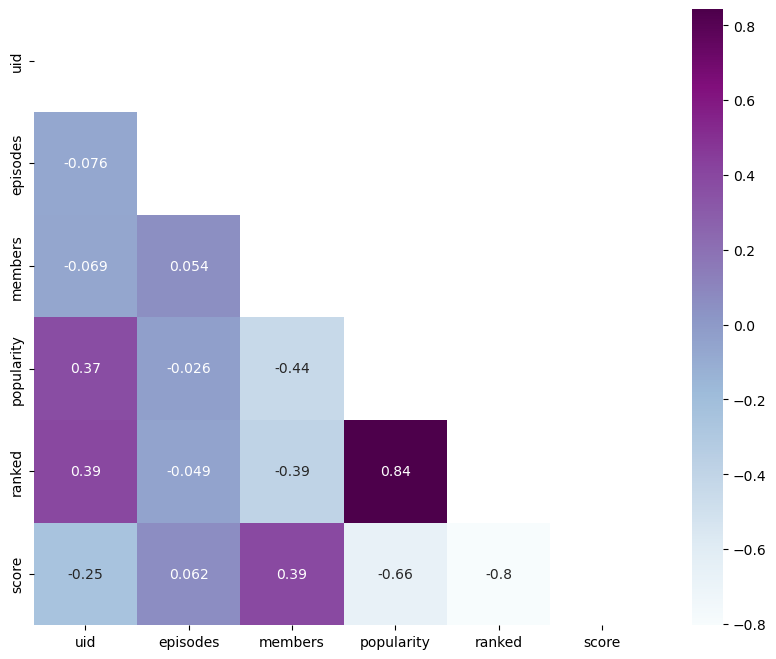

In [26]:
mascara=np.zeros_like(corr_matrix)
mascara[np.triu_indices_from(mascara) ]=True 

fig , ax=plt.subplots(figsize=(10,8))
ax= sns.heatmap(corr_matrix, mask=mascara, annot=True, cmap= 'BuPu')

In [27]:
#EL MAPA DE CALOR ME PERMITE VER CON MAYOR VISUALIZACION SI HAY MULTICOLINEALIDAD ENTRE LAS COLUMNAS
#DECIDO ELIMINAR RANKED YA QUE DE IGUAL FORMA ESTA COLUMNA PRESENTA 3212 NANs
df_anime=df_anime.drop(['ranked'], axis=1)
df_anime.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,8.83


In [28]:
#PARA TRATAR LOS NULOS DE 'score' DECIDO APLICAR REGRESION LINEAL

X = df_anime[~df_anime.score.isnull()][['members', 'popularity']]
y = df_anime[~df_anime.score.isnull()]['score']

X_nulls = df_anime[df_anime.score.isnull()][['members', 'popularity']]

model = LinearRegression().fit(X,y)
score_pred = model.predict(X_nulls)
score_pred  = np.round(score_pred )
print("Length of predictions: ",len(score_pred ))

locations = list(df_anime[df_anime['score'].isnull() == True].index)
print("Length of locations: ",len(locations))

list(df_anime.columns)
col = list(df_anime.columns).index('score')

df_anime.loc[df_anime.score.isnull(),'score'] = score_pred 

df_anime.head()

Length of predictions:  404
Length of locations:  404


,uid,title,synopsis,genre,aired,episodes,members,popularity,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,8.83


In [29]:
#VERIFICO QUE NO HAYA NULOS EN 'score'
df_anime.isnull().sum()

uid             0
title           0
synopsis        0
genre           0
aired           0
episodes      543
members         0
popularity      0
score           0
dtype: int64

In [30]:
#TRATAMOS LOS NANs CON EL PROMEDIO EN LA COLUMNA 'episodes'
ep_mean=np.mean(df_anime['episodes'])
df_anime['episodes']=df_anime['episodes'].fillna(ep_mean)


In [31]:
df_anime.isnull().sum()

uid           0
title         0
synopsis      0
genre         0
aired         0
episodes      0
members       0
popularity    0
score         0
dtype: int64

EDA DE LA DATA 

In [32]:
#APLICO DESCRIBE PARAA VER LA INFORMACION ESTADISTICA DE LA DATA
df_anime.describe().T.style.set_properties(**{"background-color": "#9966ff","color":"white","border": "1.5px  solid black"})

,count,mean,std,min,25%,50%,75%,max
uid,16368.000000,19920.474707,14227.234351,1.000000,5307.750000,19952.000000,34178.250000,40960.000000
episodes,16368.000000,11.658578,48.036369,1.000000,1.000000,2.000000,12.000000,3057.000000
members,16368.000000,27665.055718,93646.766247,25.000000,297.000000,1879.000000,11901.000000,1871043.000000
popularity,16368.000000,8131.919599,4714.683351,1.000000,4042.500000,8115.000000,12208.250000,16338.000000
score,16368.000000,6.350335,0.968135,1.250000,5.710000,6.370000,7.030000,9.230000


In [33]:
#PARA VOLVER A CONFIRMA SI YA NO HAY FILAS REPETIDAS
#HAY VALORES REPETIDOS TODAVIA 
df_anime.describe(include=object).T.style.set_properties(**{"background-color": "#9966ff","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
title,16368,16214,3-gatsu no Lion: Ugoku! Nya Shogi,2
synopsis,16368,15195,Not Known,785
genre,16368,4851,['Hentai'],946
aired,16368,11127,Not available,295


In [34]:
#VERIFICO LA INFORMACION QUE SE REPITE 
df_anime[df_anime['title']=='3-gatsu no Lion: Ugoku! Nya Shogi']

#LAS FILAS SE PARECEN EN LA MAYORIA DE DATOS PERO SE DIFERENCIAN EN 'members'

,uid,title,synopsis,genre,aired,episodes,members,popularity,score
1099,38154,3-gatsu no Lion: Ugoku! Nya Shogi,Not Known,['Game'],"Jan 25, 2017 to Aug 23, 2017",10.0,907,9789,6.14
15530,38154,3-gatsu no Lion: Ugoku! Nya Shogi,Not Known,['Game'],"Jan 25, 2017 to Aug 23, 2017",10.0,906,9789,6.14


In [35]:
#EN ESTE CASO SE DIFERENCIAN POR 'popularity'
df_anime[df_anime['title']=='Mini Skirt Gakuen']

,uid,title,synopsis,genre,aired,episodes,members,popularity,score
2714,2990,Mini Skirt Gakuen,Under the uniforms of this girls volleyball te...,['Hentai'],"Dec 21, 2001",1.0,1054,9399,4.44
3069,2990,Mini Skirt Gakuen,Under the uniforms of this girls volleyball te...,['Hentai'],"Dec 21, 2001",1.0,1054,9398,4.44


In [36]:
#ELIMINO LAS ENTRADAS REPETIDAS POR 'title'
df_anime['title']=df_anime['title'].drop_duplicates()

In [37]:
#PARA VOLVER A CONFIRMA SI YA NO HAY FILAS REPETIDAS EN 'title'
df_anime.describe(include=object).T.style.set_properties(**{"background-color": "#9966ff","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
title,16214,16214,Haikyuu!! Second Season,1
synopsis,16368,15195,Not Known,785
genre,16368,4851,['Hentai'],946
aired,16368,11127,Not available,295


In [38]:
#VERIFICO SI HAY NULOS 
#LOS NULOS SON LOS TITULOS ELIMINADOS PORQUE SE REPITEN
df_anime.isnull().sum()

uid             0
title         154
synopsis        0
genre           0
aired           0
episodes        0
members         0
popularity      0
score           0
dtype: int64

In [39]:
#ELIMINO LAS FILAS CON NULOS
df_anime=df_anime.dropna()

In [40]:
#CONFIRMO QUE YA NO HAY NULOS EN MI DATA
df_anime.isnull().sum()

uid           0
title         0
synopsis      0
genre         0
aired         0
episodes      0
members       0
popularity    0
score         0
dtype: int64

In [41]:
len(df_anime)

16214

In [42]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#e6e6fa","#d8Bfd8","#dda0dd""#ebfef0","#d7bde2","#c39bd3","#af7ac5","#9b59b6","#884eao","#76448a","#633974","#512e5f","#9932cc","#9932cc"]

DISTIBUCION DE LA DATA NUMERICA

In [87]:
#SELECCIONO SOLO DATA NUMERICA
data_num=df_anime.select_dtypes(np.number)
data_num.head()

,uid,episodes,members,popularity,score
0,28891,25.0,489888,141,8.82
1,23273,22.0,995473,28,8.83
2,34599,13.0,581663,98,8.83
3,5114,64.0,1615084,4,9.23
4,31758,1.0,214621,502,8.83


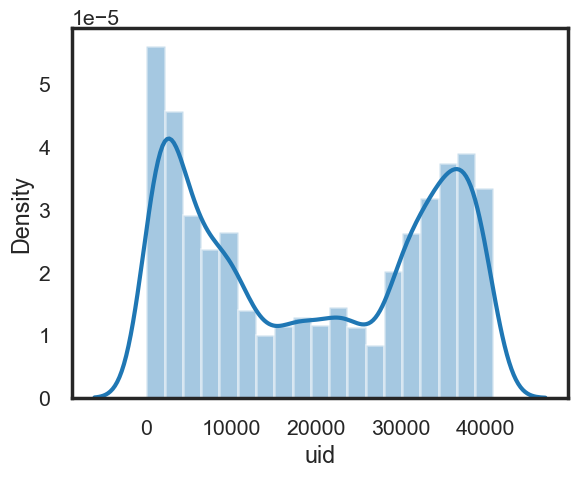

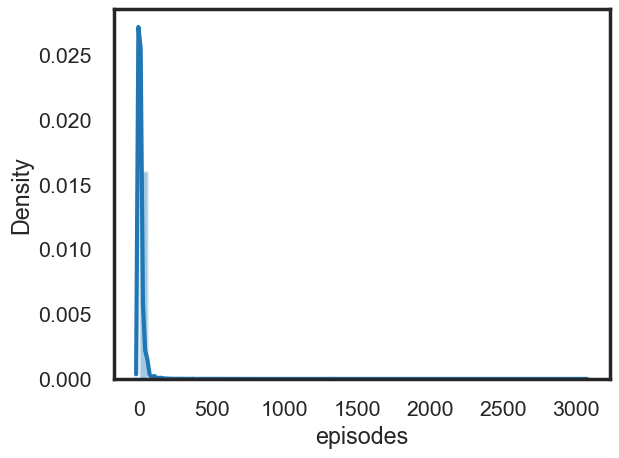

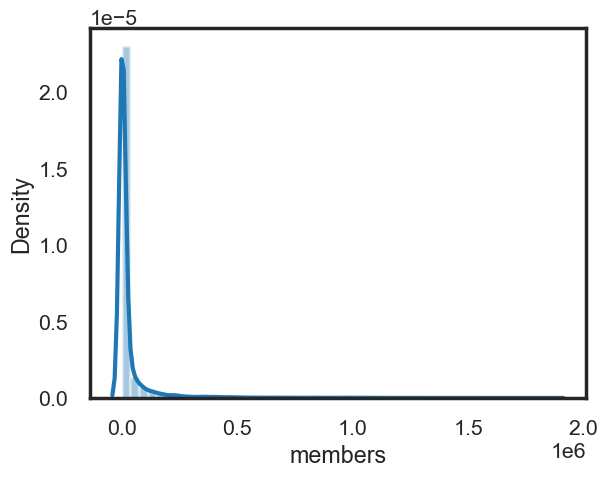

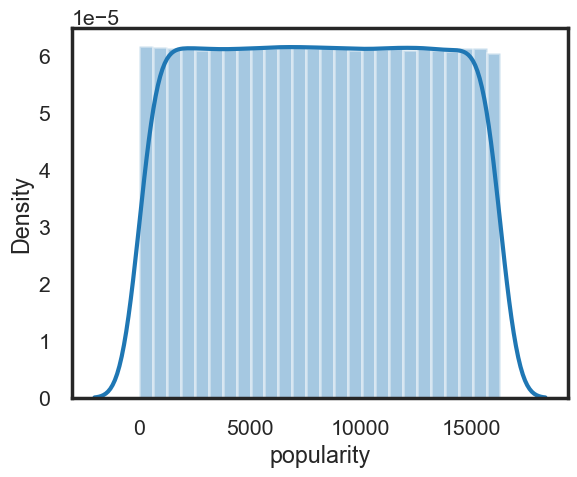

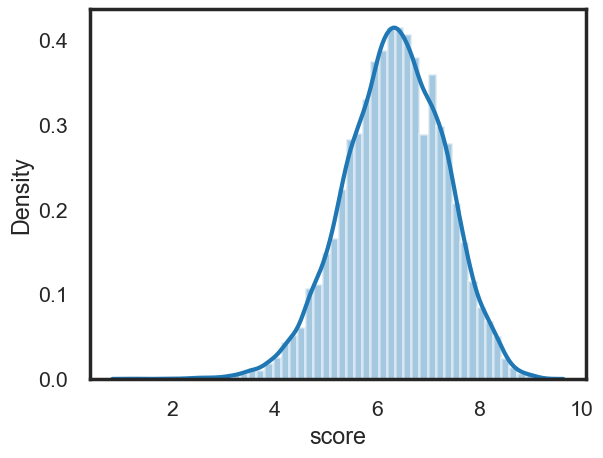

In [91]:
#GRAFICO TODAS LAS COLUMNAS PARA IDENTIFICAR SU DISTRIBUCION 
for i in data_num:
  sns.distplot(data_num[i])
  plt.show()

In [81]:
#LA GRAFICA DE SCORE ES LA QUE REPRESENTA MAS A UNA DISTRIBUCION NORMAL Y EN ESTA GRAFICA SE APRECIA MEJOR 
def anime_score():
    fig,ax = plt.subplots(figsize=(8,4))
    sns.histplot(data=df_anime, x="score", kde=True,color=palette[8],bins=20,alpha=1,fill=True,edgecolor=palette[12])
    ax.set(xlim=(1, 10))
    ax.set(title="Distribution of score");

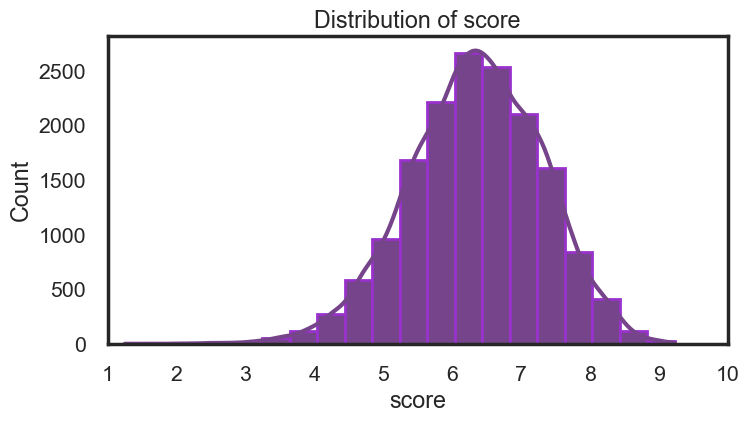

In [82]:
anime_score()

In [83]:
def anime_popularity():
    fig,ax = plt.subplots(figsize=(8,4))
    sns.histplot(data=df_anime, x="popularity", kde=True,color=palette[8],bins=20,alpha=1,fill=True,edgecolor=palette[12])
    ax.set(xlim=(1, 10))
    ax.set(title="Distribution of popularity");

TOP POR PUNTAJE

In [105]:
px.bar(df_anime.sort_values(by='popularity',ascending=True).head(10),x='title',y='popularity',text='title',color_discrete_sequence=['purple'],template='plotly_dark',title='<b> 10 animes más populares')

GENEROS POPULARES

In [46]:
#GENERO UNA DATABASE YA LIMPIA CON 
df_anime.to_csv('anime_dfclean.csv', index=False)

In [47]:
#TRAIGO MI DF YA LIMPIA
df = pd.read_csv('anime_dfclean.csv')
df

,uid,title,synopsis,genre,aired,episodes,members,popularity,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,8.83
...,...,...,...,...,...,...,...,...,...
16209,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,7.50
16210,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,7.50
16211,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,7.56
16212,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,7.56


In [48]:
#PIRMERO QUIERO VER EL FORMATO DE LA COLUMNA 'genre'
df['genre']

#TIENE FORMATO DE LISTA CON '' AL INICIO Y FIN POR LO QUE SE LEE COMO UN STR

0        ['Comedy', 'Sports', 'Drama', 'School', 'Shoun...
1        ['Drama', 'Music', 'Romance', 'School', 'Shoun...
2        ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...
3        ['Action', 'Military', 'Adventure', 'Comedy', ...
4         ['Action', 'Mystery', 'Supernatural', 'Vampire']
                               ...                        
16209    ['Action', 'Comedy', 'Super Power', 'Martial A...
16210          ['Slice of Life', 'Comedy', 'Supernatural']
16211               ['Slice of Life', 'Comedy', 'Shounen']
16212                                           ['Action']
16213    ['Comedy', 'Drama', 'Romance', 'School', 'Slic...
Name: genre, Length: 16214, dtype: object

In [49]:
#USO apply PARA CAMBIAR ESE FORMATO DE STR A LISTA 
df['genre']=df['genre'].apply(eval)

In [50]:
#CUENTO LOS GENEROS EN LA COLUMNA 'genre' 
df['genre'].value_counts()

[Hentai]                                               923
[Music]                                                692
[Comedy]                                               622
[Kids]                                                 404
[Dementia]                                             201
                                                      ... 
[Fantasy, Mecha, Drama]                                  1
[Action, Adventure, Comedy, Ecchi, Fantasy, Seinen]      1
[Action, Adventure, Fantasy, Sci-Fi, Slice of Life]      1
[Comedy, Drama, Martial Arts, Seinen]                    1
[Music, Romance, Super Power, Supernatural]              1
Name: genre, Length: 4851, dtype: int64

In [51]:
#HAGO UNA LISTA VACIA PARA GUARDAR TODOS LOS GENEROS QUE HAY 
generos=[]
for i in range(len(df['genre'])):
  for ii in df['genre'][i]:
    generos.append(ii)

In [52]:
#CUENTO LOS GENEROS QUE EXISTEN EN LA DB EN GENERAL
genre_info = Counter(generos)
genre_info

Counter({'Comedy': 5640,
         'Sports': 679,
         'Drama': 2457,
         'School': 1567,
         'Shounen': 1915,
         'Music': 1863,
         'Romance': 1762,
         'Sci-Fi': 2462,
         'Adventure': 2753,
         'Mystery': 674,
         'Fantasy': 2971,
         'Action': 3572,
         'Military': 541,
         'Magic': 1013,
         'Supernatural': 1358,
         'Vampire': 135,
         'Slice of Life': 1744,
         'Demons': 453,
         'Historical': 1050,
         'Super Power': 600,
         'Mecha': 1060,
         'Parody': 619,
         'Samurai': 199,
         'Seinen': 805,
         'Police': 239,
         'Psychological': 322,
         'Josei': 93,
         'Space': 475,
         'Kids': 2456,
         'Shoujo Ai': 73,
         'Ecchi': 740,
         'Shoujo': 668,
         'Horror': 434,
         'Shounen Ai': 91,
         'Cars': 117,
         'Martial Arts': 367,
         'Game': 348,
         'Thriller': 120,
         'Dementia': 402,
       

In [98]:
#APLICO LA FUNCION PARA GRAIFICAR LOS GENEROS DE ACUERDO A LA SUMA DE ELLOS 
def show_genres():
    plt.figure(figsize=(20, 15))
    plt.title("Genres", fontsize=32)
    sq.plot(genre_info.values(), label=genre_info.keys(), text_kwargs={'fontsize':20}, bar_kwargs={'alpha':.7}, pad=False)
    plt.axis("off");

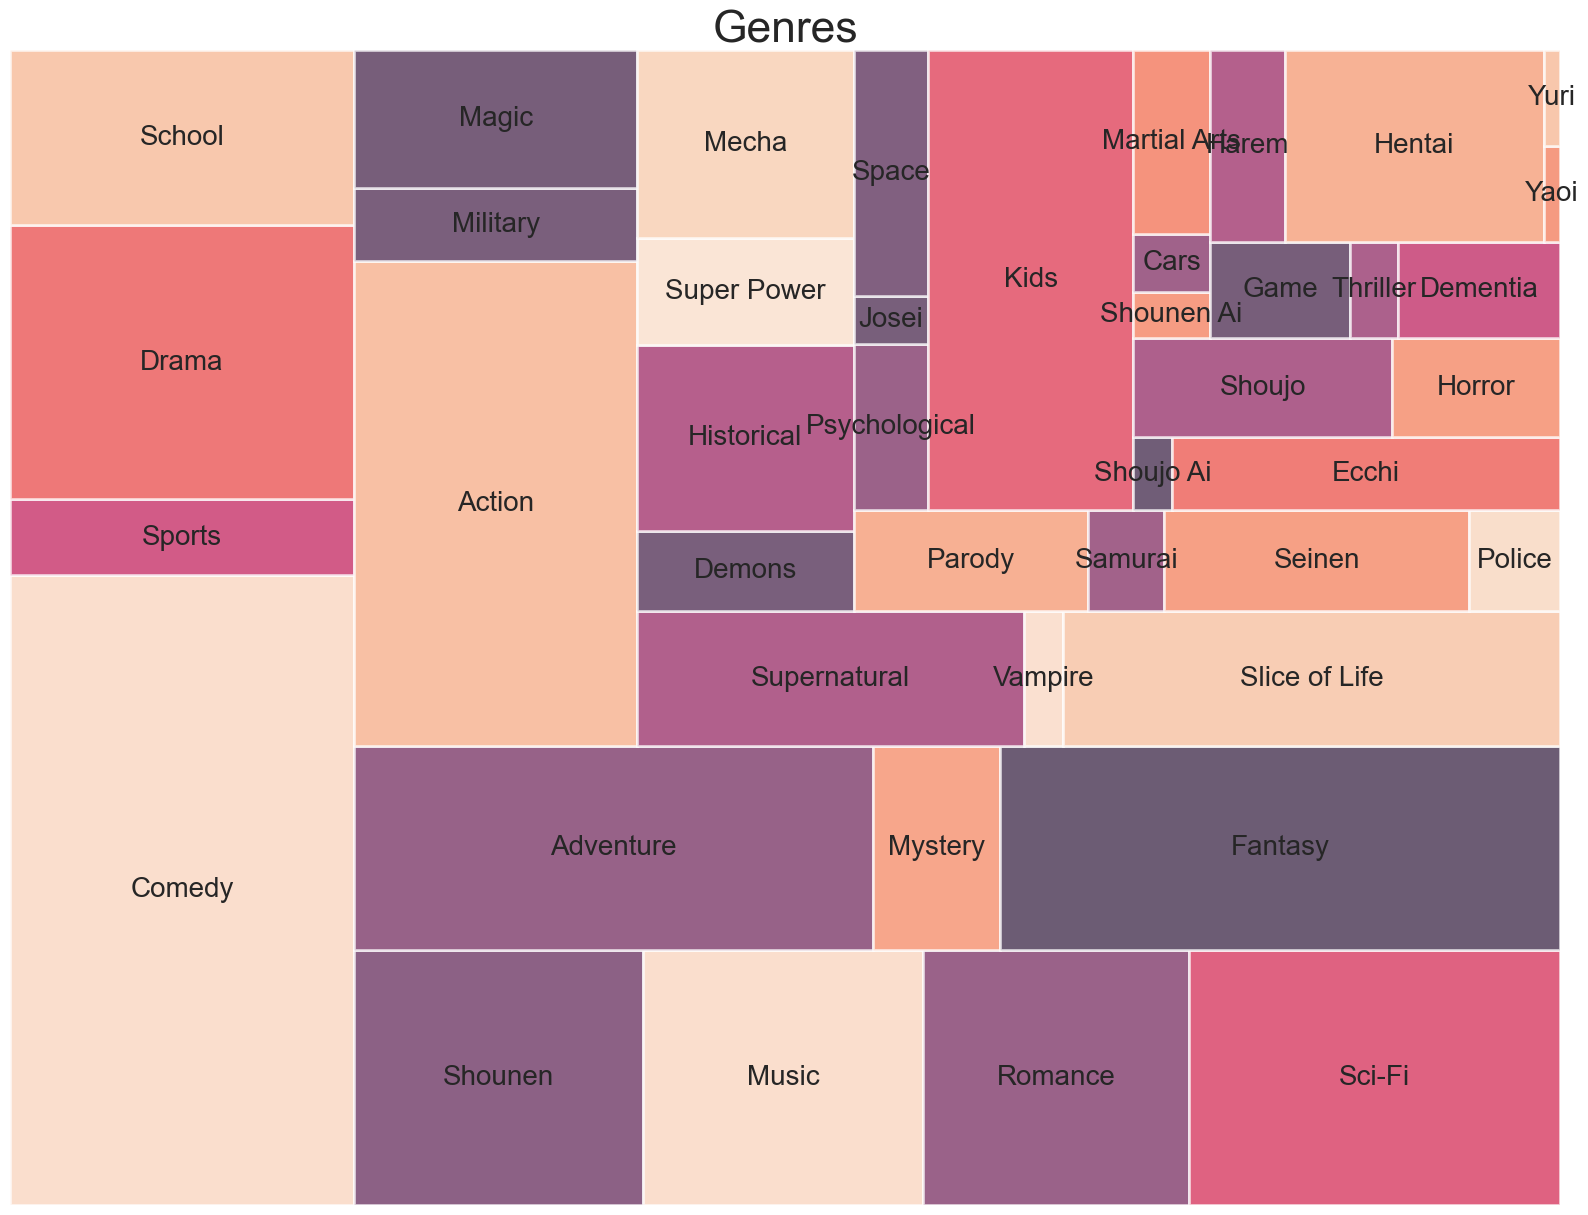

In [99]:
show_genres()

In [55]:
#QUIERO VER COMO ESTA LA COLUMNA DE 'genre', AHORA QUE ES UNA LISTA QUIERO QUE
# SOLAMENTE SE QUEDEN LOS GENEROS COMO STR DENTRO DE LA COLUMNA 'genre'
df['genre']

0                 [Comedy, Sports, Drama, School, Shounen]
1                 [Drama, Music, Romance, School, Shounen]
2             [Sci-Fi, Adventure, Mystery, Drama, Fantasy]
3        [Action, Military, Adventure, Comedy, Drama, M...
4                 [Action, Mystery, Supernatural, Vampire]
                               ...                        
16209    [Action, Comedy, Super Power, Martial Arts, Sh...
16210                [Slice of Life, Comedy, Supernatural]
16211                     [Slice of Life, Comedy, Shounen]
16212                                             [Action]
16213      [Comedy, Drama, Romance, School, Slice of Life]
Name: genre, Length: 16214, dtype: object

In [56]:
#PARA PASAR LOS ELEMENTOS DE UNA LISTA A UN STRING EN UNA COLUMNA DE UN DF 
# USO join DE LA CLASE str
df['genre']= df['genre'].apply(lambda x: ','.join(x))

In [57]:
#CONFIRMO LOS CAMBIOS 
df['genre']

0                       Comedy,Sports,Drama,School,Shounen
1                       Drama,Music,Romance,School,Shounen
2                   Sci-Fi,Adventure,Mystery,Drama,Fantasy
3        Action,Military,Adventure,Comedy,Drama,Magic,F...
4                      Action,Mystery,Supernatural,Vampire
                               ...                        
16209       Action,Comedy,Super Power,Martial Arts,Shounen
16210                    Slice of Life,Comedy,Supernatural
16211                         Slice of Life,Comedy,Shounen
16212                                               Action
16213            Comedy,Drama,Romance,School,Slice of Life
Name: genre, Length: 16214, dtype: object

TOP ANIMES BASED ON POPULARITY AND MEMBERS

In [58]:
#VEO SI EXISTE ALGUNA CORRELACION ENTRE LA POPULARIDAD Y LOS MIEMBROS 
df_anime[["popularity","members"]].corr()

,popularity,members
popularity,1.00000,-0.43987
members,-0.43987,1.00000


In [59]:
#VEO SI EXISTE ALGUNA CORRELACION ENTRE LA EVALUACION DE UN ANIME Y LA POPULARIDAD
df_anime[["popularity","score"]].corr()

,popularity,score
popularity,1.000000,-0.663759
score,-0.663759,1.000000


In [60]:
df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Comedy,Sports,Drama,School,Shounen","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Drama,Music,Romance,School,Shounen","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Sci-Fi,Adventure,Mystery,Drama,Fantasy","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Action,Military,Adventure,Comedy,Drama,Magic,F...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Action,Mystery,Supernatural,Vampire","Jan 6, 2017",1.0,214621,502,8.83


In [61]:
#RENOMBRO LA COLUMNA DE 'uid' 
df = df.rename(columns={'uid': 'anime_id'})
df.head()

,anime_id,title,synopsis,genre,aired,episodes,members,popularity,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Comedy,Sports,Drama,School,Shounen","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Drama,Music,Romance,School,Shounen","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Sci-Fi,Adventure,Mystery,Drama,Fantasy","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Action,Military,Adventure,Comedy,Drama,Magic,F...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Action,Mystery,Supernatural,Vampire","Jan 6, 2017",1.0,214621,502,8.83


In [62]:
#DECIDO BORRAR 'popularity','synopsis' PORQUE NO ME SIRVEN PARA EL ANALISIS
#ME QUEDO CON 'aired' PARA VER SI CAMBIAN LAS RECOMENDACIONES
df_new=df.drop(['popularity','synopsis' ],axis=1)
df_new.head()

,anime_id,title,genre,aired,episodes,members,score
0,28891,Haikyuu!! Second Season,"Comedy,Sports,Drama,School,Shounen","Oct 4, 2015 to Mar 27, 2016",25.0,489888,8.82
1,23273,Shigatsu wa Kimi no Uso,"Drama,Music,Romance,School,Shounen","Oct 10, 2014 to Mar 20, 2015",22.0,995473,8.83
2,34599,Made in Abyss,"Sci-Fi,Adventure,Mystery,Drama,Fantasy","Jul 7, 2017 to Sep 29, 2017",13.0,581663,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"Action,Military,Adventure,Comedy,Drama,Magic,F...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,"Action,Mystery,Supernatural,Vampire","Jan 6, 2017",1.0,214621,8.83


In [63]:
df_new.dtypes

anime_id      int64
title        object
genre        object
aired        object
episodes    float64
members       int64
score       float64
dtype: object

In [64]:
df_new.shape

(16214, 7)

Re-codificando variables

No era conveniente tener los géneros apilados como categoría separadas por comas en una única casilla, por lo que se separaron y pasaros a variables dicotómicas al igual que "type". Las variables restantes serán escaladas para no tener problemas con los algoritmos futuros, dado que utilizan distancias.

In [65]:
anime_data = pd.concat([df_new["genre"].str.get_dummies(sep=","),
                        df_new["aired"].str.get_dummies(sep=","),
                           df_new[["score"]],df_new[["members"]],
                           df_new["episodes"]],axis=1)

anime_data.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Sep 30,Sep 4,Sep 5,Sep 6,Sep 7,Sep 8,Sep 9,score,members,episodes
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,8.82,489888,25.0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,8.83,995473,22.0
2,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,8.83,581663,13.0
3,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,9.23,1615084,64.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.83,214621,1.0


In [66]:
anime_data = MaxAbsScaler().fit_transform(anime_data)
anime_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.55579632e-01, 2.61826158e-01, 8.17795224e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.56663055e-01, 5.32041754e-01, 7.19659797e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        9.56663055e-01, 3.10876340e-01, 4.25253517e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.19068256e-01, 3.60344471e-02, 3.92541708e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.19068256e-01, 2.19540652e-02, 3.27118090e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.19068256e-01, 6.86248258e-02, 3.27118090e-04]])

KNN 

In [67]:
KNNanime = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(anime_data)
distances, indices = KNNanime.kneighbors(anime_data)

In [73]:
def nombres_indices(name):  # Toma el nombre del anime y devuelve su indice correspondiente
    return df_new[df_new["title"]==name].index.tolist()[0] 

In [113]:
def animes_recomendados(nombre): 
     found_id = nombres_indices(nombre)
     for id in indices[found_id][1:]:
          print(df_new.loc[id]["title"])
      
animes_recomendados('Kimetsu no Yaiba')
        

Kimetsu no Yaiba Movie: Mugen Ressha-hen
Dororo
Enen no Shouboutai
Totsukuni no Shoujo
Bem
Oni
Kataku
Onmyou Hyakki Monogatari
Kamishibai Itazura Tanuki no Maki


In [117]:
def animes_recomendados(nombre): 
     found_id = nombres_indices(nombre)
     for id in indices[found_id][1:]:
          print(df_new.loc[id]["title"])
      
animes_recomendados('Made in Abyss')

Made in Abyss Movie 2: Hourou Suru Tasogare
Made in Abyss Movie 1: Tabidachi no Yoake
Made in Abyss Movie 3: Fukaki Tamashii no Reimei
Xing You Ji: Fengbao Famila
18if
Sprin' Pan: Mae e Susumou!
Hirune Hime: Shiranai Watashi no Monogatari
To the Moon
1000-nen Joou: Queen Millennia
